In [ ]:
from abc import ABC, abstractmethod

#Declaracion de clases abstractas y metodos abstractos
#definicion de la clase vehiculo, que es una clase abstracta y tiene un metodo abstracto tipo
#y un metodo para asignar la estrategia de conduccion y otro para conducir

class Vehiculo(ABC):
    def __init__(self, marca, modelo):
        self.marca = marca
        self.modelo = modelo
        self.conduccion = None  # Strategy
#definicion de la estrategia de conduccion, que se asigna en el constructor
    def set_conduccion(self, estrategia):
        self.conduccion = estrategia

    def conducir(self):
        if self.conduccion:
            self.conduccion.conducir(self)
        else:
            print("No hay estrategia de conducción asignada.")
#utilizamos el patron decorator para agregar funcionalidades a la clase vehiculo con abstractmethod 
# para definir el tipo de vehiculo
    @abstractmethod
    def tipo(self):
        pass
#utilizo eq para comparar vehiculos, comparando marca y modelo
    def __eq__(self, other):
        return isinstance(other, Vehiculo) and self.marca == other.marca and self.modelo == other.modelo
#uso el patron decorator para agregar vehiculos a la flota, comparando si el vehiculo ya existe en la flota
    # y si no existe lo agrega a la flota
    def __add__(self, other):
        if isinstance(other, Vehiculo):
            flota = ControlFlota.obtener_instancia()
            flota.agregar_vehiculo(other)
            return self
        raise TypeError("Solo se pueden agregar objetos de tipo Vehiculo a la flota")

#SUBCLASES
#se utilizan subclases para definir los tipos de vehiculos, que heredan de la clase vehiculo
#y redefinen el metodo tipo para devolver el tipo de vehiculo

class Automovil(Vehiculo):
    def tipo(self):
        return "Automóvil"

class Camion(Vehiculo):
    def tipo(self):
        return "Camión"

class Motocicleta(Vehiculo):
    def tipo(self):
        return "Motocicleta"

#STRATEGY PATTERN :CONDUCION DINAMICA
#definicion de la estrategia de conduccion, que se asigna en el constructor
##coloco  pass en el metodo abstracto para que no de error
class EstrategiaConduccion(ABC):
    @abstractmethod
    def conducir(self, vehiculo):
        pass

class ConduccionNormal(EstrategiaConduccion):
    def conducir(self, vehiculo):
        print(f"{vehiculo.tipo()} {vehiculo.marca} {vehiculo.modelo} conduce de manera normal.")

class ConduccionDeportiva(EstrategiaConduccion):
    def conducir(self, vehiculo):
        print(f"{vehiculo.tipo()} {vehiculo.marca} {vehiculo.modelo} conduce de manera deportiva.")

class ConduccionEconomica(EstrategiaConduccion):
    def conducir(self, vehiculo):
        print(f"{vehiculo.tipo()} {vehiculo.marca} {vehiculo.modelo} conduce de manera económica.")

#DECORATOR PATTERN : ASISTENCIA
#utilizo el patron decorator para agregar funcionalidades a la clase vehiculo
#la definicion de la clase vehiculo decorador, que hereda de vehiculo y redirecciona los atributos al vehiculo decorado
#y redefine el metodo conducir para agregar la funcionalidad de asistencia
class VehiculoDecorator(Vehiculo):
    def __init__(self, vehiculo):
        self._vehiculo = vehiculo
    
    def __getattr__(self, nombre): ##redirecciona los atributos al vehiculo decorado
        return getattr(self._vehiculo, nombre)

    def tipo(self):
        return self._vehiculo.tipo()

    def conducir(self):
        self._vehiculo.conducir()
##utilizo eq para comparar vehiculos, comparando marca y modelo
        # y si el vehiculo decorado es igual al vehiculo
    def __eq__(self, other):
        return self._vehiculo == other
##uso add para agregar vehiculos a la flota, comparando si el vehiculo decorado ya existe en la flota
        # y si no existe lo agrega a la flota
    def __add__(self, other):
        return self._vehiculo + other
##decoradores de asistencia
##para cada tipo de asistencia, se crea una clase que hereda de VehiculoDecorator y redefine el metodo conducir
#para agregar la funcionalidad de asistencia de estacionamiento o de mantenimiento de carril
#y se le asigna el vehiculo decorado
class AsistenciaEstacionamiento(VehiculoDecorator):
    def conducir(self):
        self._vehiculo.conducir()
        print("→ Asistencia de estacionamiento activada.")

class AsistenciaCarril(VehiculoDecorator):
    def conducir(self):
        self._vehiculo.conducir()
        print("→ Asistencia de mantenimiento de carril activada.")

#SINGLETONE PATTERN : CONTROL DE FLOTA
#definicion de la clase control de flota, que es un singleton y tiene una lista de vehiculos
#y un metodo para agregar vehiculos a la flota y otro para listar los vehiculos de la flota
class ControlFlota:
    _instancia = None

    def __init__(self):
        if ControlFlota._instancia is not None:
            raise Exception("Esta clase es un singleton.")
        self.vehiculos = []
## se usa staticmethod para obtener la instancia de la clase control de flota
#y se crea una instancia si no existe
#y se retorna la instancia

    @staticmethod
    def obtener_instancia():
        if ControlFlota._instancia is None:
            ControlFlota._instancia = ControlFlota()
        return ControlFlota._instancia

    def agregar_vehiculo(self, vehiculo):##agrega vehiculos a la flota
        if vehiculo not in self.vehiculos:
            self.vehiculos.append(vehiculo)

    def listar_vehiculos(self): ##lista los vehiculos de la flota
        print("\n🚘 Flota actual:")
        for v in self.vehiculos:
            print(f"• {v.tipo()} - {v.marca} {v.modelo}")
        if not self.vehiculos:
            print("→ No hay vehículos en la flota.")

#USO EJEMPLO para probar el funcionamiento de la clase
#se crean instancias de los vehiculos y se les asigna la estrategia de conduccion

if __name__ == "__main__":
    auto = Automovil("Toyota", "Corolla")
    moto = Motocicleta("Yamaha", "FZ")
    camion = Camion("Volvo", "FH")

    # Estrategias de conducción
    # ConduccionNormal, ConduccionDeportiva, ConduccionEconomica
    #
    auto.set_conduccion(ConduccionEconomica())
    moto.set_conduccion(ConduccionDeportiva())
    camion.set_conduccion(ConduccionNormal())

    # Decoradores que agregan funcionalidades
    # AsistenciaEstacionamiento, AsistenciaCarril
    auto = AsistenciaEstacionamiento(auto)
    camion = AsistenciaCarril(camion)

    # para Conducir vehículos
    auto.conducir()
    moto.conducir()
    camion.conducir()

    # Comparar vehículos para ver si son iguales
    # refleja el uso de __eq__
    otro_auto = Automovil("Toyota", "Corolla")
    print("\n¿Son iguales?", auto == otro_auto)  # True

    # aqui se agrega vehículos a la flota usando +
    auto + moto
    auto + camion

    # por ultimo se muestra  el listado de la flota
    # ControlFlota es un singleton, por lo que se obtiene la instancia y se lista la flota
    flota = ControlFlota.obtener_instancia()
    flota.listar_vehiculos()

Automóvil Toyota Corolla conduce de manera económica.
→ Asistencia de estacionamiento activada.
Motocicleta Yamaha FZ conduce de manera deportiva.
Camión Volvo FH conduce de manera normal.
→ Asistencia de mantenimiento de carril activada.

¿Son iguales? True

🚘 Flota actual:
• Motocicleta - Yamaha FZ
• Camión - Volvo FH


##2.DIAGRAMAS UML 
- Diagrama de clases (con herencia, estrategias, decoradores, singleton).


![UML AUT T2 1.png](<attachment:UML AUT T2 1.png>)




- Diagrama de relaciones (composición, asociación).



![alt text](<GIAGRAMA DE RELACIONES U1T2.drawio-1.png>)

[def]: <attachment:UML AUT T2 1.png>
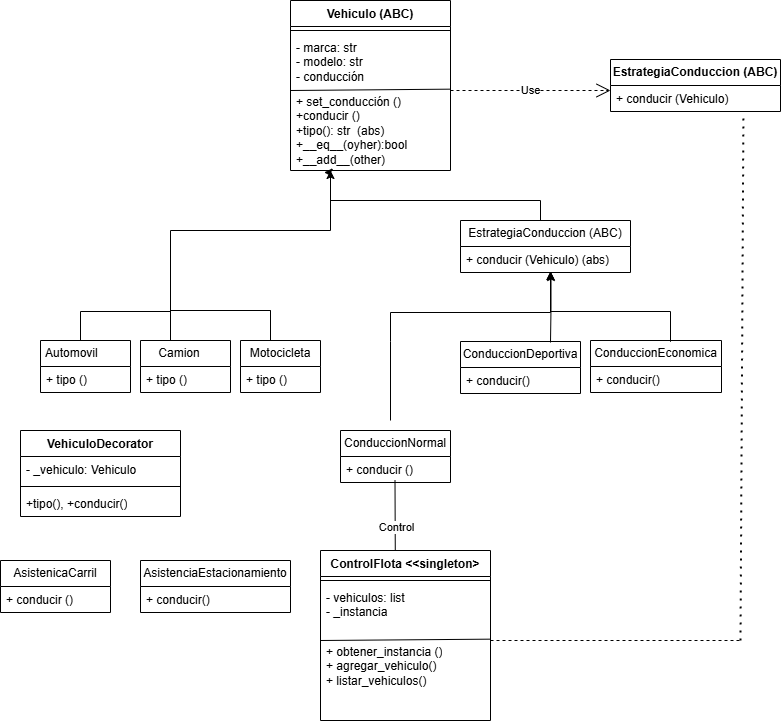

JUSTIFICACION CREACION CODIGO

-Sistema de Vehiculos Autonomos
    Se desarrolló un sistema orientado a objetos en Python aplicando varios patrones de diseño para representar vehículos con comportamientos dinámicos.

-Estructura 
1. Clase abstracta Vehiculo
    Define atributos comunes (marca, modelo) y un método abstracto tipo().
    Puede tener una estrategia de conducción asignada dinámicamente (patrón Strategy).
    Permite comparar vehículos (__eq__) y agregarlos a una flota (__add__).
2. Subclases 
    Automovil, Camion, y Motocicleta: heredan de Vehiculo e implementan tipo().

3. Patrón Strategy
    Clases como ConduccionNormal, ConduccionDeportiva, ConduccionEconomica permiten cambiar dinámicamente el comportamiento de conducción de un vehículo.

4. Patrón Decorator
    Clases como AsistenciaEstacionamiento y AsistenciaCarril agregan funcionalidades sin modificar las clases originales de los vehículos.
    VehiculoDecorator actúa como clase base para los decoradores.

5. Patrón Singleton
    ControlFlota se asegura de que solo exista una instancia que maneje la lista de vehículos registrados.
    Los vehículos se pueden agregar usando el operador +.